## Data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed.csv", index_col=0)

# Question 1
What factors most strongly predict box office success?
- Budget
- Cast popularity
- IMDb rating

## Budget vs Worldwide Revenue

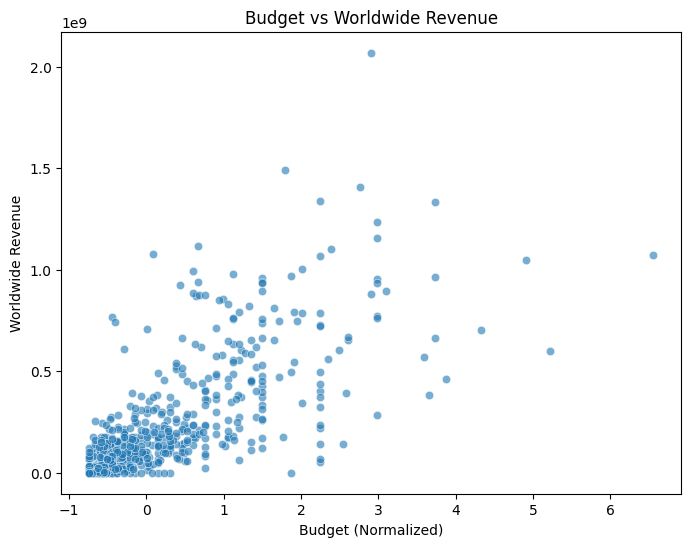

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="budget",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Budget vs Worldwide Revenue")
plt.xlabel("Budget (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()


Movies with higher budgets tend to generate higher revenue, but the wide spread indicates that budget alone does not guarantee box office success.

## IMDb Rating vs Worldwide Revenue

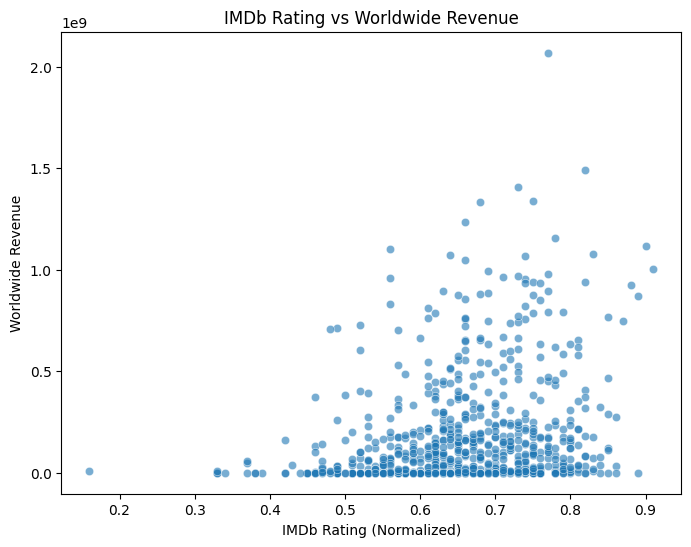

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="imdb_rating",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("IMDb Rating vs Worldwide Revenue")
plt.xlabel("IMDb Rating (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()

Higher audience ratings are generally associated with better financial performance, although several highly rated movies still earn modest revenue.

## Cast Popularity vs Revenue

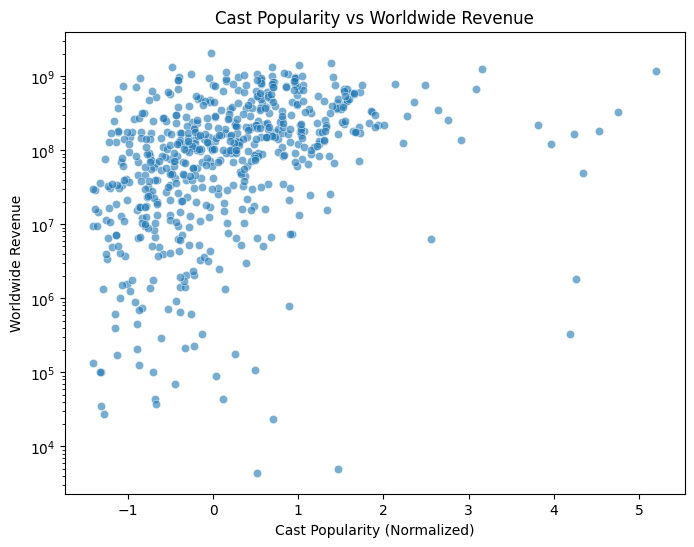

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="cast_popularity_mean",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Cast Popularity vs Worldwide Revenue")
plt.xlabel("Cast Popularity (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.yscale("log")
plt.show()


Cast popularity shows a positive but weak relationship with revenue compared to budget.

## Correlation Between Key Features

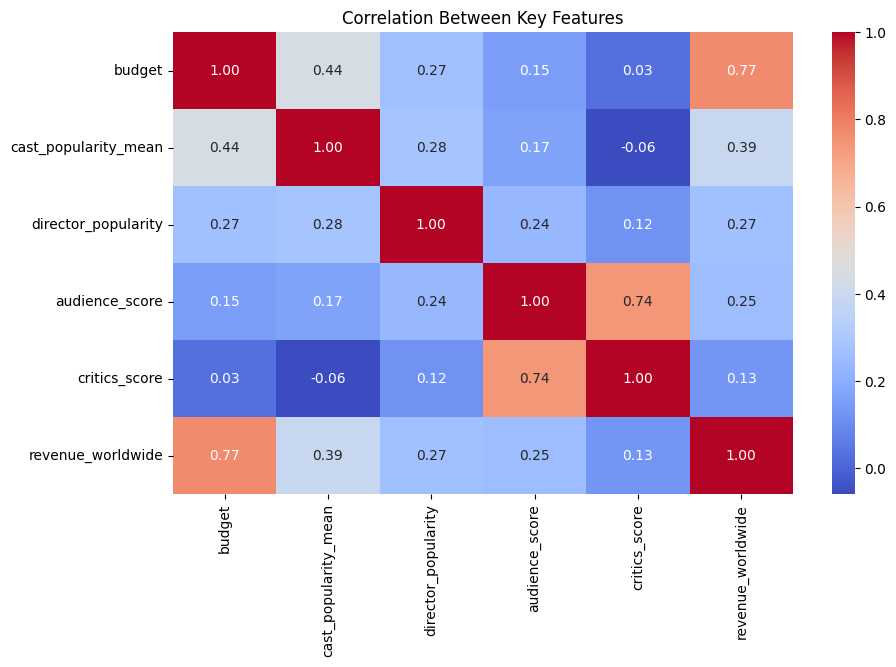

In [7]:
plt.figure(figsize=(10,6))

corr = df[[
    "budget",
    "cast_popularity_mean",
    "director_popularity",
    "audience_score",
    "critics_score",
    "revenue_worldwide"
]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Between Key Features")
plt.show()

Budget has the strongest correlation with revenue, followed by audience ratings, while cast and director popularity have weaker effects.

# Question 2
Do movies released in summer perform better financially than those in winter?

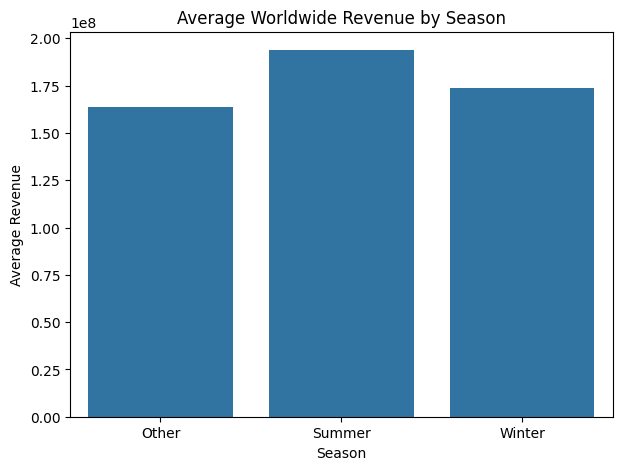

In [9]:
season_revenue = df.groupby("season")["revenue_worldwide"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=season_revenue,
    x="season",
    y="revenue_worldwide"
)

plt.title("Average Worldwide Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Average Revenue")
plt.show()

Movies released in summer tend to earn higher average revenue compared to winter and other seasons.

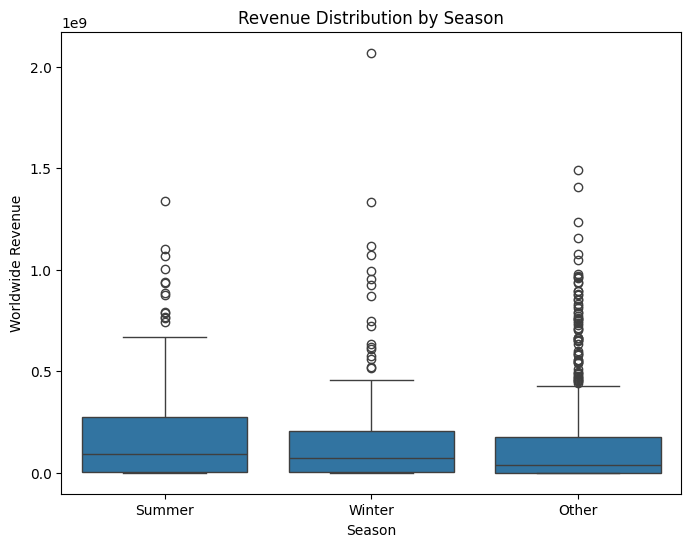

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="season",
    y="revenue_worldwide"
)

plt.title("Revenue Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Worldwide Revenue")
plt.show()

Summer releases show higher medians and more extreme high-end outliers, reflecting blockbuster releases.

# Question 3
Is there a significant difference between critics’ and audience ratings across genres?

## Average Rating Across All Genres

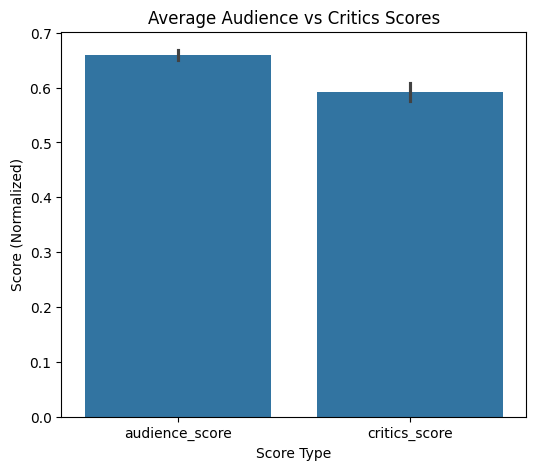

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["audience_score", "critics_score"]] = scaler.fit_transform(
    df[["audience_score", "critics_score"]]
)

avg_scores = df.melt(
    value_vars=["audience_score", "critics_score"],
    var_name="Score Type",
    value_name="Score"
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=avg_scores,
    x="Score Type",
    y="Score"
)

plt.title("Average Audience vs Critics Scores")
plt.ylabel("Score (Normalized)")
plt.show()


Critics tend to rate movies slightly lower on average compared to audiences.

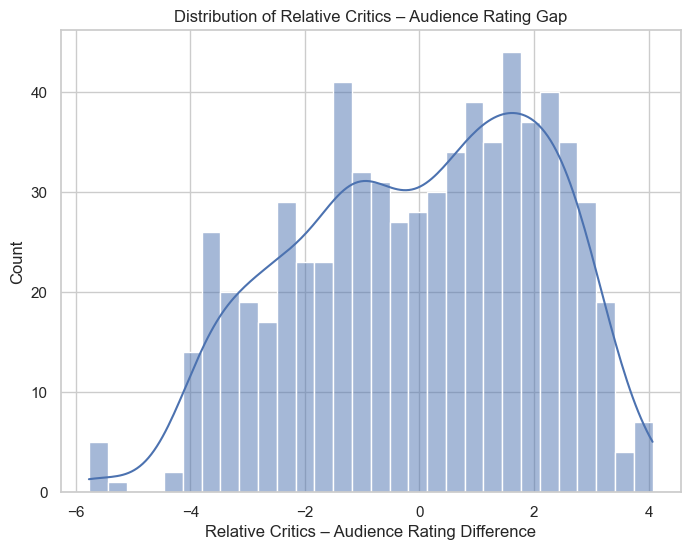

In [22]:
# Rating Gap Distribution
df["rating_gap"] = (
    (df["critics_score"] - df["critics_score"].mean()) -
    (df["audience_score"] - df["audience_score"].mean())
)


plt.figure(figsize=(8,6))
sns.histplot(df["rating_gap"], bins=30, kde=True)

plt.title("Distribution of Relative Critics – Audience Rating Gap")
plt.xlabel("Relative Critics – Audience Rating Difference")
plt.show()

Most movies cluster around a small rating gap, but some titles are significantly more appreciated by audiences than critics.

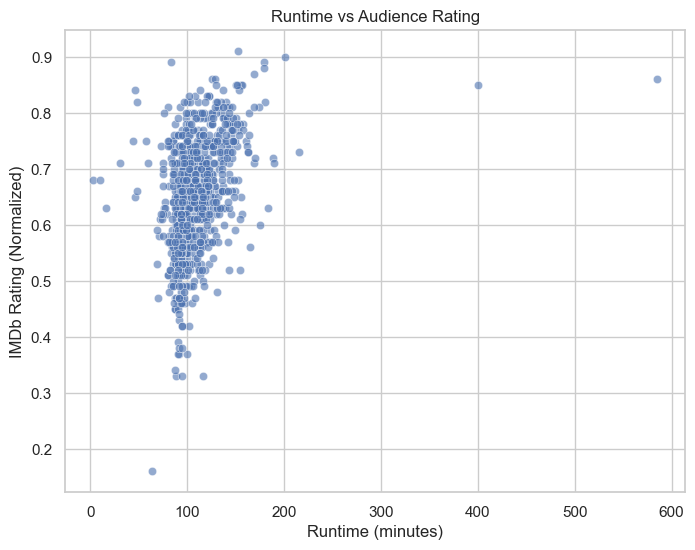

In [ ]:
# Runtime vs Audience Rating
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="runtime",
    y="audience_score",
    alpha=0.6
)

plt.title("Runtime vs Audience Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Audience Rating (Normalized)")
plt.show()

Extremely long or short movies tend to receive slightly lower audience ratings.